# Attention !!! Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.

Turn in Problem 1, 5, 7.

Extra credit (0.5 pionts) 4.

# Problem 1: Moontaro prequel

You might wonder how Hamtaro came up with the mean for the growth rate of each coin in the previous homework. He estimated them using MLE!

To simplify the problem, consider a slightly different model for stock pricing. The price at the end of each day is the price of the previous day multiplied by a fixed, but unknown, rate of return, $\alpha$, with some noise, $w$. For a two-day period, we can observe the following Markov process: $P(y_2, y_1, y_0 | \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0 |\alpha)$ where $ y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2), y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2), y_0 \sim \mathcal{N}(0,\lambda)$

Find the MLE of the rate of return, $\alpha$, given the observed price at the end of each day $y_2,y_1,y_0$.  In other words, compute for the value of $\alpha$ that maximizes $P(y_2,y_1,y_0|\alpha)$.

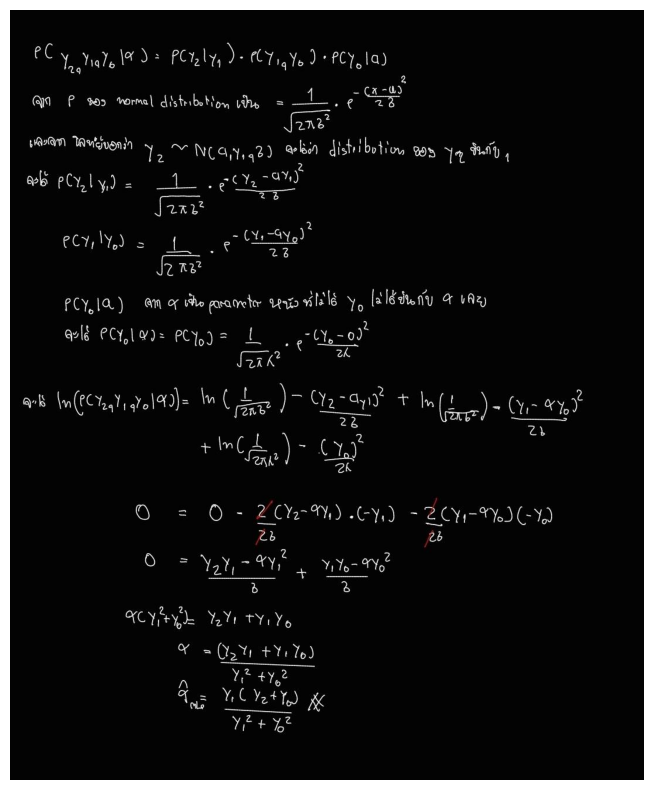

In [57]:
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
image = Image.open("2_1.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

# Problem 2: Hamtaro and his entertainment


From the previous assignment, you might be wondered why Hamtaro is trying so hard is to build a cloud service. This is because he has a lifelong dream of opening his entertainment website, Hamhub, which needs a service from the cloud provider. After successfully building his own cloud service, he creates the website and monitors the number of visitors every day.

Recently, the most famous website in this field of entertainment was blocked by the government last Monday. From this news, he wants to know whether the blockade has a significant effect on the number of Hamhub's visitors?

*   Before last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(10000, \sigma^2)$.
*   After last Monday, Hamtaro spent ten days collecting the number of users.
```
X1 = array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])
```
1. Can Hamtaro conclude that the blockade significantly increases the number of visitors with a significant level of 0.001?
2. If the sample mean and variance are held the same, what is the minimum number of samples Hamtaro need to reject the null hypothesis? For the same observation effect, larger sample size will result in a significant result.

In [58]:
import numpy as np
from scipy.stats import t
x1 = np.array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])
u = 10000
a = 0.001
n = len(x1)

In [59]:
# 1.
x_bar = x1.mean()
variance = (1/(n-1))*sum([(x1[i]-x_bar)**2 for i in range(n)])
std = np.sqrt(variance)
t_x = (x_bar-u)/(std/np.sqrt(n))
t_critical = t.ppf(1-a,n-1)
if (t_x > t_critical):
  print(f'สามารถสรุปได้ว่า ปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors เกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: {t_x} > t-critical: {t_critical}')
else:
  print(f'สามารถสรุปได้ว่า ไม่ปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors ไม่สามารถสรุปได้ว่าเกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: {t_x} < t-critical: {t_critical}')

สามารถสรุปได้ว่า ไม่ปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors ไม่สามารถสรุปได้ว่าเกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: 3.641470691529548 < t-critical: 4.296805662730113


In [60]:
# 2.
i = 11
while (True):
  t_critical = t.ppf(1-a,i-1)
  t_x = (x_bar-u)/(std/np.sqrt(i))
  if (t_x > t_critical):
    print(f'ต้องใช้ n: {i} เพื่อปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors เกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: {t_x} > t-critical: {t_critical}')
    break
  i+=1
# else:
#   print(f'สามารถสรุปได้ว่า ไม่ปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors ไม่สามารถสรุปได้ว่าเกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: {t_x} < t-critical: {t_critical}')

ต้องใช้ n: 13 เพื่อปฏิเสธ H0 ทำให้การเพิ่มขึ้นของ visitors เกิดจากการ Block อย่างมีนัยสำคัญ เพราะ t: 4.151915393700754 > t-critical: 3.9296332646264927


# Problem 3: T-Test

Hamtaro performs a t-test for the null hypothesis $H_0: \mu=10$ at significance level $\alpha=0.05$ from a dataset consisting of $n=16$ elements with sample mean $11$ and sample variance $4$.
1. Should we reject the null hypothesis in favor of $H_a: \mu \neq 10$
2. What if we test against $H_{a^{'}}: \mu >10$ ?

In [61]:
import numpy as np
n = 16
u = 10
a = 0.05
x_bar = 11
std = np.sqrt(4)

In [62]:
# 1.
t_x = (x_bar-u)/(std/np.sqrt(n))
t_right = t.ppf(1-(a/2),n-1)
t_left = t.ppf(a/2,n-1)
if (t_x < t_left or t_x > t_right):
  print(f'ปฏิเสธ H0 เพราะ t: {t_x} < t-left: {t_left} หรือ t: {t_x} > t-right: {t_right}')
else:
  print(f'ไม่ปฏิเสธ H0 เพราะ t: {t_x} < t-left: {t_left} หรือ t: {t_x} > t-right: {t_right}')

ไม่ปฏิเสธ H0 เพราะ t: 2.0 < t-left: -2.131449545559323 หรือ t: 2.0 > t-right: 2.131449545559323


In [63]:
t_critical = t.ppf(1-a,n-1)
if (t_x > t_critical):
  print(f'ปฏิเสธ H0 เพราะ t: {t_x} > t-critical: {t_critical}')
else:
  print(f'ไม่ปฏิเสธ H0 เพราะ  t: {t_x} > t-critical: {t_critical}')

ปฏิเสธ H0 เพราะ t: 2.0 > t-critical: 1.7530503556925547


# Problem 4: Hamtaro and his entertainment - 2

The story in this problem is a parallel universe of problem 2.


Last Monday, Hamtaro added the new channel to the website, and he wanted to know its effects on the number of visitors. However, the most famous website in this field of entertainment was also blocked by the government on the same day. Since there was no sign of unblocking from the government, Hamtaro could not perform a hypothesis testing on only the factor of adding the new channel. How could Hamtaro know that the changes from adding the new channel are significant?

There are four scenarios in this problem,
1.   Before the last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(\mu_0, \sigma^2)$ (no block + no new channel).
2.  After the last Monday, the average number of visitors are $x_1 \sim \mathcal{N}(\mu_1, \sigma^2)$ (block + new channel).
3.  Days after removing the channel, the average number of visitors are $x_2 \sim \mathcal{N}(\mu_2, \sigma^2)$ (block + no new channel).
4.  In an imaginative scenario that the new channel is added but the most famous website haven't been blocked, the average number of visitors is $x_3 \sim \mathcal{N}(\mu_3, \sigma_3^2)$ (no block + new channel).

Assuming that a user decides to visit
the website because of the blockade, a new channel, or none of the two (independent).

1. Hamtaro found the p-value of 0.03 from doing a t-test on $H_a:x_1 > x_0$. Can he conclude that adding the new channel significantly increases the number of visitors? Justify your answer.
2. Hamtaro did another t-test and found the p-value of 0.1 from testing $H_a: x_1 > x_2$. Does he now have enough information to conclude anything about $x_3$ ?
3. Does the current setups, 1. and 2., lead to the final question about the significance of adding the new channel?
  * If yes, what should you do next to get the final answer?
  * If no, Can we use the hypothesis testing answer to solve this problem?
    * If yes, design your testing, describe assumptions you made.
    * If no, explain why.

In [64]:
print('''
ข้อ 4-1 ตอบ ไม่ได้เพราะถ้า average number ของ visitors เมื่อ block + new channel ปฏิเสธ H0 จริง การเพิ่มขึ้นของ Visitors อาจจะเกิดจากการ Block ของ goverment ก็ได้อาจจะไม่เกิดจาก
การที่เพิ่ม new channel อย่างเดียว
''')
print('''
ข้อ 4-2 ตอบ จากโจทย์กำหนดมาว่าการที่ user จะเข้าช่องทางไหนเป็นอิสระต่อกันนั้นหมายความว่าจะ Block หรือไม่ block นั้นไม่เกี่ยวข้องกับการเข้าช่องทางใหม่หรือเก่าทำให้ ดังนั้น H1: x1>x2 กับ H1: x3>x0
คือสมมุติฐานเดียวกัน แต่ Assume ว่า Hamtaro กำหนด Significant level เป็น 0.05 (โจทย์ไม่ได้บอก) ก็จะได้ว่า P value > 0.05 ซึ่งไม่ปฏิเสธ H0 เลยต้องตอบว่าไม่สามารถสรุปได้ว่าการเพิ้่น Channel
แล้วจะเพิ่ม average visitors อย่างมีนัยสำคัญ
''')
print('''
ข้อ 4-3 ตอบ จากข้อ 1 ถ้าเรา Assume significant level (alpha) เป็น 0.05 ก็จะได้ว่า H1 เป็นจริงหรือก็คือปฏิเสธ H0 ซึ่งทำให้เราได้ข้อมูลเพิ่มวา การเพิ่มขึ้่นของ Channel และ Blocking ทำให้เพิ่ม
average visitors อย่างมีนัยสำคัญ และจากข้อสองเราได้ว่า การเพิ่ม new channel ไม่สามารถสรุปได้ว่า average visitors เพิ่มขึ้น ทำให้เราการ setup 1. and 2. สามารถสรุปปัญหานี้ได้ว่า การเพิ่มขึ้นของ
Channel ไม่ได้เพิ่ม average visitors อย่างมีนัยสำคัญ
''')


ข้อ 4-1 ตอบ ไม่ได้เพราะถ้า average number ของ visitors เมื่อ block + new channel ปฏิเสธ H0 จริง การเพิ่มขึ้นของ Visitors อาจจะเกิดจากการ Block ของ goverment ก็ได้อาจจะไม่เกิดจาก
การที่เพิ่ม new channel อย่างเดียว


ข้อ 4-2 ตอบ จากโจทย์กำหนดมาว่าการที่ user จะเข้าช่องทางไหนเป็นอิสระต่อกันนั้นหมายความว่าจะ Block หรือไม่ block นั้นไม่เกี่ยวข้องกับการเข้าช่องทางใหม่หรือเก่าทำให้ ดังนั้น H1: x1>x2 กับ H1: x3>x0
คือสมมุติฐานเดียวกัน แต่ Assume ว่า Hamtaro กำหนด Significant level เป็น 0.05 (โจทย์ไม่ได้บอก) ก็จะได้ว่า P value > 0.05 ซึ่งไม่ปฏิเสธ H0 เลยต้องตอบว่าไม่สามารถสรุปได้ว่าการเพิ้่น Channel
แล้วจะเพิ่ม average visitors อย่างมีนัยสำคัญ


ข้อ 4-3 ตอบ จากข้อ 1 ถ้าเรา Assume significant level (alpha) เป็น 0.05 ก็จะได้ว่า H1 เป็นจริงหรือก็คือปฏิเสธ H0 ซึ่งทำให้เราได้ข้อมูลเพิ่มวา การเพิ่มขึ้่นของ Channel และ Blocking ทำให้เพิ่ม
average visitors อย่างมีนัยสำคัญ และจากข้อสองเราได้ว่า การเพิ่ม new channel ไม่สามารถสรุปได้ว่า average visitors เพิ่มขึ้น ทำให้เราการ setup 1. and 2. สามารถสรุปปัญ

# Problem 5: Hamtaro and his casino

After opening Hamhub for a short while, the website was also banned by the government since it contains some 'immoral' videos. Hamtaro then moves on and follows his other passionate dream of creating a gambling empire. Therefore, he hones his skills on public gambling websites which can be easily found even if they are illegal.

After playing for a while, he notices that the online gambling business has great business potential since the risk of gambling websites being banned is much lower than his previous entertainment business. Thus, he decides to open his own online casino.

At the opening date, he offers only a dice game.
The rule is simple, the player selects a number and rolls a die. The player will receive a reward if the rolled number is the same as the one he chooses.
Hamtaro wants to maximize his profit by cheating using a baised die. Since it is an online casino, he could easily change the biasness of the die after the player selects a number. However, the player is not a fool and would notice if it is too biased.

As a player,
1. Formulate the null hypothesis $H_0$ and alternative hypothesis $H_a$ to investigate the biasness of the dice.
2. Should the $H_a$ be one-sided or two-sided? What are the differences and benefits over another in this problem?
3. The player found the selected number is rolled out 3 out of 30 attempts. If he wants no more than $10\%$ of type-I error, can he reject the $H_0$? Justify your answer.
4. If the player plays 200 games, what is the rejection region if he wants no more than $10\%$ type-I error?
5. What would be the result in 4. if the true distribution is approximated by the Normal distribution?

As Hamtaro,
6. The mastermind Hamtaro observes that players will play no more than 200 games a day. He knows that some players studied Com Eng Math 2 and might perform hypothesis testing to check whether Hamtaro cheats. Hamtaro assumes that the players will use a significant level of $0.01$. He thinks that it is safe enough if the probability of being caught by a player is less than $0.05$. What should be the lowest probability of rolling the selected number? (How much bias can he put in the dice) Answer in floating number with a precision of 3.
7. What if Hamtaro accepts the probability of being caught $=0.01$ instead? Answer in floating number with the precision of 5.

(Hint Problem 6 and 7 are related to test power)


In [65]:
print('''
ข้อ 1 ตอบ ในฐาณะผู้เล่น H0 จะเป็น Probability >= 1/6 H1 จะได้ว่า probability < 1/6
''')
print('''
ข้อ 2 ตอบ จาก H1 จะได้ว่า H1 เป็น one sided โดยที่ two sided จะแตกต่างจาก One sided ตรงที่ two sided เราสามารถสรุปได้ว่ามันไม่ยุติธรรมโดยไม่ได้สนว่า หน้าที่เราเลือกจะออกมากขึ้นหรือน้อยลง
ซึ่งมีข้อดีตรงที่มันสรุปได้ตรงตัวว่า การทอยลูกเต๋ามันยุติธรรมหรือไม่ยุติธรรม แต่ถ้าเป็น One sided จะทำให้เราสรุปได้แค่ เราได้ประโยชน์(Probability > 1/6)หรือเราเสียประโยชน์ (Probability < 1/6) เท่านั้น
ซึ่งมีข้อดีว่า ถ้าเราเลือก H1 เป็น P < 1/6 แปลว่าเรากำลังสงสัยว่า Hamtaro กำลังโกงเราอยู่
''')


ข้อ 1 ตอบ ในฐาณะผู้เล่น H0 จะเป็น Probability >= 1/6 H1 จะได้ว่า probability < 1/6


ข้อ 2 ตอบ จาก H1 จะได้ว่า H1 เป็น one sided โดยที่ two sided จะแตกต่างจาก One sided ตรงที่ two sided เราสามารถสรุปได้ว่ามันไม่ยุติธรรมโดยไม่ได้สนว่า หน้าที่เราเลือกจะออกมากขึ้นหรือน้อยลง
ซึ่งมีข้อดีตรงที่มันสรุปได้ตรงตัวว่า การทอยลูกเต๋ามันยุติธรรมหรือไม่ยุติธรรม แต่ถ้าเป็น One sided จะทำให้เราสรุปได้แค่ เราได้ประโยชน์(Probability > 1/6)หรือเราเสียประโยชน์ (Probability < 1/6) เท่านั้น
ซึ่งมีข้อดีว่า ถ้าเราเลือก H1 เป็น P < 1/6 แปลว่าเรากำลังสงสัยว่า Hamtaro กำลังโกงเราอยู่



In [66]:
from scipy.stats import binom, norm
import numpy as np

In [67]:
# 3.
prob_cdf = binom.cdf(3, 30, 1/6)
# print(prob_cdf)
if (prob_cdf <= 0.1):
  print(f"ปฏิเสธ H0 เพราะ Probability ที่ได้มีค่า:{round(prob_cdf,4)} ซึ่งน้อยกว่า 0.1")
else:
  print(f"ไม่ปฏิเสธ H0 เพราะ Probability ที่ได้มีค่า:{round(prob_cdf,4)} ซึ่งมีค่ามากกว่าเท่ากับ 0.1")

ไม่ปฏิเสธ H0 เพราะ Probability ที่ได้มีค่า:0.2396 ซึ่งมีค่ามากกว่าเท่ากับ 0.1


In [68]:
# 4. หา k ที่มากที่สุดที่ทำให้ prob <= 0.1
k = 1
while (binom.cdf(k,200,1/6) <= 0.1):
  k+=1
print(f'Rejection region มีค่าเป็น {k-1}')

Rejection region มีค่าเป็น 26


In [69]:
# 5.
k = 1
val = norm.cdf(k, (1/6)*200,np.sqrt(200*(1/6)*(5/6)))
while (val <= 0.1):
  k+=1
  val = norm.cdf(k, (1/6)*200,np.sqrt(200*(1/6)*(5/6)))
print(f'Rejection region มีค่าเป็น {k-1}')

Rejection region มีค่าเป็น 26


In [70]:
# 6.
# find k
k = 1
while (binom.cdf(k,200,1/6) <= 0.01):
  k+=1
k-=1
# find p min
lo, hi = 1e-12, 1 - 1e-12
while(True):
    mid = (lo + hi) / 2
    p_mid = binom.cdf(k, 200, mid)
    if abs(p_mid - 0.05) < 1e-10:
        break
    if p_mid > 0.05:
        lo = mid
    else:
        hi = mid
print(round((lo+hi)/2,3))

0.148


In [71]:
# 7.
# find k
k = 1
while (binom.cdf(k,200,1/6) <= 0.01):
  k+=1
k-=1
# find p min
lo, hi = 1e-12, 1 - 1e-12
while(True):
    mid = (lo + hi) / 2
    p_mid = binom.cdf(k, 200, mid)
    if abs(p_mid - 0.01) < 1e-10:
        break
    if p_mid > 0.01:
        lo = mid
    else:
        hi = mid
print(round((lo+hi)/2,5))

0.16602


# Problem 6: Hamtaro and the new AC company



From the previous assignment, Hamtaro tried to control the temperature of the cloud storage room so that the failure rate of storage disks is as low as possible. Later, a new company came to him and offered a new AC system that, in theory, could provide a more stable room temperature. To strengthen their claim, the company sends the historical room temperature of the new AC, of which the target temperature is set 15, to Hamtaro.

Given that Hamtaro's existing AC provides the room temperature of $t \sim \mathcal{N}(15, 0.5^2)$:

**TODO:6**
1. Formulate the null and alternative hypotheses for determining whether the new AC is better than the existing one or not. List your assumptions that are required to make this experiment possible.
2. Can you decide which AC system is better? Justify your answer.


In [72]:
import numpy as np
temp_log = np.array([14.66017243, 14.82134507, 14.75354867, 15.02847413, 15.96338554,
       15.46598137, 15.35605532, 14.91048177, 15.13237189, 14.38789873,
       15.76833691, 14.85383663, 15.28335022, 15.06718901, 15.44364169,
       14.29511914, 15.13458572, 14.57428013, 15.14885716, 14.08580661,
       15.6006654 , 14.98109974, 14.95059512, 14.91460432, 14.68809902,
       15.4988617 , 14.99646465, 15.00654947, 14.65024467, 15.20684546,
       15.540787  , 15.39207656, 14.53129171, 14.27527689, 14.37856735,
       15.4685476 , 14.94268835, 15.28311368, 14.8878152 , 15.52350034,
       14.35791689, 15.11741279, 15.41721681, 15.56690632, 15.30108101,
       14.7138976 , 15.39536719, 15.02994055, 14.74887633, 14.81419334,
       15.36735467, 14.89706838, 14.89134826, 15.19781408, 15.3273354 ,
       15.16729623, 14.82748547, 15.59488402, 15.49763473, 15.12876929,
       14.11446324, 14.61298282, 14.57006854, 15.13227246, 14.68369474,
       14.96443757, 15.73872741, 15.48498884, 15.35770021, 15.13471147,
       14.94871779, 13.91322937, 14.84786617, 14.42086587, 15.26216287,
       14.33225067, 14.94179209, 14.57095395, 15.1261513 , 14.93201265,
       14.82252959, 15.19061294, 15.33257912, 14.72448901, 15.54406202,
       14.72704346, 14.9902773 , 14.71477903, 14.90866689, 14.28862563,
       15.04302902, 15.06973955, 14.51951387, 14.61413562, 14.58725869,
       14.41407727, 15.05585075, 14.69229146, 14.30425173, 14.76913898,
       14.27819269, 14.93917912, 14.22675051, 15.20964   , 14.96122782,
       14.05371218, 15.10273752, 15.50886439, 15.43965366, 14.98863063,
       15.34326459, 15.23694786, 13.90170147, 15.29660252, 15.26635161,
       15.34710713, 14.34928594, 15.61509746, 15.80476574, 15.36769161,
       14.52027993, 14.80624255, 14.58269606, 15.58830065, 14.25665696,
       14.86914893, 15.40500584, 15.28855103, 15.43907472, 15.18196326,
       15.47088551, 15.06327054, 15.01022434, 14.43508736, 15.3791887 ,
       14.86202479, 15.1697766 , 14.6434633 , 15.7263277 , 14.31813452,
       15.30657752, 14.91471004, 15.1456617 , 14.93856484, 15.14098396,
       14.76996958, 15.3890821 , 15.53549397, 15.28528007, 15.61416247,
       14.4514347 , 14.75105769, 14.22367585, 14.93898327, 14.61033024,
       14.96348807, 15.24771829, 14.84653005, 15.36780845, 14.96846837,
       14.66094081, 14.75905691, 14.96864336, 15.55687252, 14.62138304,
       16.02201637, 14.95786084, 14.98549356, 15.18029872, 14.82305383,
       15.093562  , 15.98065684, 15.27950419, 15.42169411, 15.66950953,
       14.90725077, 13.69523862, 15.7470953 , 14.93824139, 15.65590845,
       14.69911713, 14.63306529, 15.09566097, 15.00531748, 15.0664824 ,
       15.00496274, 15.1577527 , 15.26365236, 14.98708579, 14.43256043,
       15.5816707 , 14.69227952, 15.22774367, 15.01510129, 15.03105086,
       15.07222669, 15.22579141, 15.34835664, 15.14017702, 15.12604511])

#Problem 7: Hamtaro Empire Part 3

After Hamtaro has successfully established his factories (in Problem 4.2 HW 3),  he further boosts the factory productivity by replacing the old machines with a new type-II variant. However, there is a concern from the local factory managers that Hamtaro might get bamboozled, since they do not observe an increase in productivity compared to the previous one. Therefore, to ease their concern, he decided to conduct a z-testing.

Given that the number of goods produced each day by the old machines was $x \sim \mathcal{N}(5000, 20^2)$ :

1. Formulate the null and alternative hypothesis for determining whether the new machine is better than the previous one at a significant level = 0.05.
2. From the testing, can Hamtaro conclude that factory productivity increased as a whole?
3. Can Hamtaro say the same for each individual factory?
4. Repeat 1-3 again but with a t-test. Is there any difference from the z-test? What, and why does it happen?

In [73]:
from scipy.stats import norm, t
import numpy as np

In [74]:
from scipy.stats import norm
import numpy as np

# 30 days of product quantity in 4 factories

fac_0 = np.array([4993.89323126, 5021.67118211, 5023.54710937, 4999.11746331,
       5001.53450095, 4986.27990953, 4987.12362188, 5004.91535087,
       4999.97591193, 5038.09176163, 4993.94184053, 5026.5264468 ,
       5040.62862593, 4979.91124088, 5008.59143715, 5016.45331659,
       5013.63203948, 5010.84253735, 5014.99772195, 5002.39462129,
       5047.80507624, 5007.23005532, 5019.87205007, 5005.76363012,
       4997.09106036, 4982.80291132, 5037.18158407, 4996.54197735,
       5007.57964251, 4971.18880247])

fac_1 = np.array([5036.80041897, 4989.33779117, 4971.68709581, 5041.92493487,
       5041.64823146, 5026.33602398, 5009.58334612, 4989.05382998,
       5031.17423169, 4992.20198911, 4970.63425555, 5007.17615704,
       4993.84416738, 5028.59671588, 5009.91388156, 5049.64187466,
       5015.12711371, 5032.2900513 , 5013.66869347, 4988.21257317,
       5020.44276181, 4985.62886808, 5022.46800468, 5042.35501669,
       5001.6153908 , 5012.14209858, 5006.14666402, 4999.93219541,
       5002.77927647, 5002.20750425])

fac_2 = np.array([5029.95293241, 5019.47959949, 4976.8427836 , 4985.22792264,
       4994.97618684, 5026.75059569, 5015.71350753, 5008.46632673,
       5037.96915682, 4990.38948551, 4988.7082206 , 5032.42440206,
       5036.41040953, 5003.75236158, 5002.62361815, 4998.8932057 ,
       5000.51153033, 5002.19196574, 5023.74534474, 5032.03601587,
       5000.10614764, 4989.74566985, 4985.97436664, 4973.63380449,
       5028.58100504, 4997.8426781 , 5011.4202198 , 5018.71432385,
       4969.03296199, 5009.23456565])
fac_3 = np.array([4962.36508403, 5015.91734917, 5030.86885403, 5012.74787091,
       5036.94455211, 4995.2103757 , 5029.84241184, 5015.68062582,
       4996.43546786, 4999.57614716, 5006.88735305, 5035.10432486,
       5017.33437936, 5006.70625696, 5007.97827037, 4981.80482708,
       5020.78603239, 4993.12742287, 4996.10718141, 4988.00315629,
       5003.00004152, 4949.54117305, 5008.6250048 , 5004.09075453,
       5026.56246304, 5011.02296759, 5010.67413795, 4990.58062539,
       5009.64435703, 5001.9413428 ])


In [75]:
# 1.
print('''
ให้ x2: เป็น number of goods product ของ new machine และให้ u2 เป็นค่าเฉลี่ยของ good prodcut ใน factories 4 factorires ที่ใช้ new machine
จะได้ H0: u2 <= 5000
และ  H1: u2 > 5000 (เพื่อทดสอบว่าจะปฏิเสธ H0 มั้ยจะได้ตีความได้ว่าดีขึั้นหรือป่าว)
''')


ให้ x2: เป็น number of goods product ของ new machine และให้ u2 เป็นค่าเฉลี่ยของ good prodcut ใน factories 4 factorires ที่ใช้ new machine
จะได้ H0: u2 <= 5000
และ  H1: u2 > 5000 (เพื่อทดสอบว่าจะปฏิเสธ H0 มั้ยจะได้ตีความได้ว่าดีขึั้นหรือป่าว)



In [76]:
# 2.
x_bar = (sum(fac_0)+sum(fac_1)+sum(fac_2)+sum(fac_3))/120
z_val = (x_bar - 5000)/(20/np.sqrt(120))
prob = norm.cdf(z_val)
# จากข้อนี้เป็นการทดสอบ Right tail เพราะ H1 เป็นเครื่องหมายมากกว่าทำให้จะปฏิเสธ H0 เมื่อ prob มากกว่า 1-significant level
if (prob > (1-0.05)):
  print(f"สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity โดยรวมได้อย่างมีนัยสำคัญเพราะ {prob} > {1-0.05}")
else:
  print(f"ไม่สามารสรุปได้ว่าปฏิเสธ H0 เพราะ {prob} < {1-0.05} ทำให้สรุปไม่ได้ว่าเครื่องจักรใหม่สามารถเพิ่ม productivity ได้อย่างมีนัยสำคัญ")

สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity โดยรวมได้อย่างมีนัยสำคัญเพราะ 0.9999886459853142 > 0.95


In [77]:
fac = ["fac_0","fac_1","fac_2","fac_3"]

In [78]:
# 3.
x = [x1,x2,x3,x4] = sum(fac_0)/30,sum(fac_1)/30,sum(fac_2)/30,sum(fac_3)/30
z = [z1,z2,z3,z4] = (x1 - 5000)/(20/np.sqrt(30)),(x2 - 5000)/(20/np.sqrt(30)),(x3 - 5000)/(20/np.sqrt(30)),(x4 - 5000)/(20/np.sqrt(30))
for i in range(len(z)):
  prob = norm.cdf(z[i])
  if (prob > (1-0.05)):
    print(f"สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ {fac[i]} ได้อย่างมีนัยสำคัญเพราะ {prob} > {1-0.05}")
  else:
    print(f"ไม่สามารสรุปได้ว่าปฏิเสธ H0 เพราะ {prob} < {1-0.05} ทำให้สรุปไม่ได้ว่าเครื่องจักรใหม่สามารถเพิ่ม productivity ของ {fac[i]} ได้อย่างมีนัยสำคัญ")

สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_0 ได้อย่างมีนัยสำคัญเพราะ 0.9847931471862857 > 0.95
สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_1 ได้อย่างมีนัยสำคัญเพราะ 0.9988717027389801 > 0.95
สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_2 ได้อย่างมีนัยสำคัญเพราะ 0.9596631595129791 > 0.95
ไม่สามารสรุปได้ว่าปฏิเสธ H0 เพราะ 0.9341265256796157 < 0.95 ทำให้สรุปไม่ได้ว่าเครื่องจักรใหม่สามารถเพิ่ม productivity ของ fac_3 ได้อย่างมีนัยสำคัญ


In [79]:
# 4.1
print('''
ให้ x2: เป็น number of goods product ของ new machine และให้ u2 เป็นค่าเฉลี่ยของ good prodcut ใน factories 4 factorires ที่ใช้ new machine
จะได้ H0: u2 <= 5000
และ  H1: u2 > 5000 (เพื่อทดสอบว่าจะปฏิเสธ H0 มั้ยจะได้ตีความได้ว่าดีขึั้นหรือป่าว)
''')


ให้ x2: เป็น number of goods product ของ new machine และให้ u2 เป็นค่าเฉลี่ยของ good prodcut ใน factories 4 factorires ที่ใช้ new machine
จะได้ H0: u2 <= 5000
และ  H1: u2 > 5000 (เพื่อทดสอบว่าจะปฏิเสธ H0 มั้ยจะได้ตีความได้ว่าดีขึั้นหรือป่าว)



In [80]:
n = 120
u = 5000
l = [fac_0,fac_1,fac_2,fac_3]

In [81]:
# 4.2
con_arr = np.concatenate((fac_0,fac_1,fac_2,fac_3))
x_bar = con_arr.mean()
variance = (1/(n-1))*(sum((con_arr[i] - x_bar)**2 for i in range(len(con_arr))))
s = np.sqrt(variance)
t_x = (x_bar - u)/(s/np.sqrt(n))
# degree of freedom be n-1 = 119
prob_cdf = t.cdf(t_x,119)
if (prob_cdf > (1-0.05)):
  print("สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity โดยรวมได้อย่างมีนัยสำคัญ")
else:
  print(f"ไม่สามารสรุปได้ว่าปฏิเสธ H0 เพราะ {prob_cdf} < {1-0.05} ทำให้สรุปไม่ได้ว่าเครื่องจักรใหม่สามารถเพิ่ม productivity ได้อย่างมีนัยสำคัญ")

สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity โดยรวมได้อย่างมีนัยสำคัญ


In [82]:
# 4.3
for i in range (len(fac)):
  x_bar = l[i].mean()
  variance = (1/(n-1))*(sum((l[i][j] - x_bar)**2 for j in range(len(l[i]))))
  s = np.sqrt(variance)
  t_x = (x_bar - u)/(s/np.sqrt(n))
  # degree of freedom be n-1 = 1
  prob_cdf = t.cdf(t_x,119)
  if (prob_cdf > (1-0.05)):
    print(f"สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ {fac[i]} ได้อย่างมีนัยสำคัญเพราะ prob {prob_cdf} > {1-0.05}")
  else:
    print(f"ไม่สามารสรุปได้ว่าปฏิเสธ H0 เพราะ {prob_cdf} < {1-0.05} ทำให้สรุปไม่ได้ว่าเครื่องจักรใหม่สามารถเพิ่ม productivity ของ {fac[i]} ได้อย่างมีนัยสำคัญ")

สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_0 ได้อย่างมีนัยสำคัญเพราะ prob 0.9999999999999998 > 0.95
สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_1 ได้อย่างมีนัยสำคัญเพราะ prob 1.0 > 0.95
สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_2 ได้อย่างมีนัยสำคัญเพราะ prob 0.9999999999833026 > 0.95
สามารสรุปได้ว่าปฏิเสธ H0 ทำให้สรุปได้ว่าการใช้เครื่องจักรใหม่สามารถเพิม productivity ของ fac_3 ได้อย่างมีนัยสำคัญเพราะ prob 0.9999999975864656 > 0.95
